In [1]:
!pip install pyrsgis
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=f5e55337a40b275cdf7b8b289d023aabfc391d9177ddea9cd5c0cfabd6b32242
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [2]:
import os, math, numpy as np
from pyrsgis import raster, convert
from osgeo import gdal
from google.colab import drive
from copy import deepcopy
from skimage.metrics import structural_similarity as ssim
from geneticalgorithm import geneticalgorithm as ga
import random
import tensorflow as tf

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
f2017 = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2017.tif"
f2018 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2018.tif"
f2019 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2019.tif"
f2020 = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2020.tif"
f2021 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2021.tif"
f2022= "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2023.tif"
f2023= '/content/drive/MyDrive/Capstone_Data/Sentinel/predicted_2023.tif'
road_network_path = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/road.tif"
pop = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/pop.tif"
metro = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/metro.tif"
school = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/metro.tif"

ds1, arr1 = raster.read(f2017,bands=1) 
ds2, arr2 = raster.read(f2018,bands=1) 
ds3, arr3 = raster.read(f2019,bands=1) 
ds4,arr4 = raster.read(f2020,bands =1)
ds5, arr5 = raster.read(f2021,bands=1) 
ds6, arr6 = raster.read(f2022,bands=1) 
ds7, arr7 = raster.read(f2023,bands=1)
road_ds,road_arr = raster.read(road_network_path,bands=1)
pop_ds, pop_arr = raster.read(pop,bands=1)
metro_ds,metro_arr = raster.read(metro,bands=1)


if(ds1.RasterXSize == ds2.RasterXSize and ds1.RasterYSize == ds2.RasterYSize and ds1.RasterYSize == road_ds.RasterYSize and  ds1.RasterXSize == road_ds.RasterXSize):
  print("Input File size matched\n")
else:
  print("Input Files are not of same size\n")
  

no_rows = ds1.RasterYSize
no_cols = ds1.RasterXSize

print(no_rows,no_cols)
print(road_ds.RasterYSize,road_ds.RasterXSize)
print(pop_ds.RasterYSize,pop_ds.RasterXSize)
print(metro_ds.RasterYSize,metro_ds.RasterXSize)

Input File size matched

1266 1177
1266 1177
1266 1177
1266 1177


In [6]:
print(np.unique(arr1,return_counts=True))
print(np.unique(arr2,return_counts=True))

arr2017 = arr1
arr2018 = arr2
arr2019 = arr3
arr2020 = arr4
arr2021 = arr5
arr2022 = arr6
arr2023 = arr7

(array([ 1,  2,  4,  5,  7,  8, 11], dtype=uint8), array([ 19576,  40345,   1179, 316438, 900159,   2839, 209546]))
(array([ 1,  2,  4,  5,  7,  8, 11], dtype=uint8), array([ 28012,  70286,   1767, 277961, 933667,   1895, 176494]))


In [7]:
arr2017[arr2017==1] =3
arr2017[arr2017==4] =2
arr2017[arr2017==5]=4
arr2017[arr2017==7]=1
arr2017[arr2017==8]=4
arr2017[arr2017==11]=2
# arr2017[arr2017==4]=2

arr2018[arr2018==1] =3
arr2018[arr2018==4] =2
arr2018[arr2018==5]=4
arr2018[arr2018==7]=1
arr2018[arr2018==8]=4
arr2018[arr2018==11]=2
# arr2018[arr2018==4]=2

arr2019[arr2019==1] =3
arr2019[arr2019==4] =2
arr2019[arr2019==5]=4
arr2019[arr2019==7]=1
arr2019[arr2019==8]=4
arr2019[arr2019==11]=2
# arr2019[arr2019==4]=2

arr2020[arr2020==1] =3
arr2020[arr2020==4]=2
arr2020[arr2020==5]=4
arr2020[arr2020==7]=1
arr2020[arr2020==8]=4
arr2020[arr2020==11]=2
# arr2020[arr2020==4]=2

arr2021[arr2021==1] =3
arr2021[arr2021==4]=2
arr2021[arr2021==5]=4
arr2021[arr2021==7]=1
arr2021[arr2021==8]=4
arr2021[arr2021==11]=2
# arr2021[arr2021==4]=2

arr2022[arr2022==1] =3
arr2022[arr2022==4]=2
arr2022[arr2022==5]=4
arr2022[arr2022==7]=1
arr2022[arr2022==8]=4
arr2022[arr2022==11]=2
# arr2022[arr2022==4]=2

print(np.unique(arr2017,return_counts=True))
print(np.unique(arr2018,return_counts=True))
print(np.unique(arr2019,return_counts=True))
print(np.unique(arr2020,return_counts=True))
print(np.unique(arr2021,return_counts=True))
print(np.unique(arr2022,return_counts=True))
print(np.unique(arr2023,return_counts=True))

(array([1, 2, 3, 4], dtype=uint8), array([900159, 251070,  19576, 319277]))
(array([1, 2, 3, 4], dtype=uint8), array([933667, 248547,  28012, 279856]))
(array([1, 2, 3, 4], dtype=uint8), array([965249, 236264,  21385, 267184]))
(array([1, 2, 3, 4], dtype=uint8), array([989554, 281444,  21209, 197875]))
(array([1, 2, 3, 4], dtype=uint8), array([1002514,  238814,   21856,  226898]))
(array([1, 2, 3, 4], dtype=uint8), array([1007092,  256310,   26563,  200117]))
(array([1, 2, 3, 4], dtype=uint16), array([1052717,  229184,   20987,  187194]))


In [8]:
print(arr2017.shape)
print(arr2018.shape)
print(arr2019.shape)
print(arr2020.shape)
print(arr2021.shape)
print(arr2022.shape)
print(arr2023.shape)

(1266, 1177)
(1266, 1177)
(1266, 1177)
(1266, 1177)
(1266, 1177)
(1266, 1177)
(1266, 1177)


In [9]:
1266*1177
0.0030723141411009
0.0306191202900243

0.0168457172155626
0.00612382405800486
0.000122892565644036
0.006246716623648896

10,68,510



1490082

In [10]:
print('2017',900159/1490082)
print('2018',933667/1490082)
print('2019',965249/1490082)
print('2020',989554/1490082)
print('2021',1002514/1490082)
print('2022',1007092/1490082)
print('2023',1052717/1490082)

2017 0.6041003112580382
2018 0.6265876643030384
2019 0.6477824710317955
2020 0.664093653906295
2021 0.6727911618286779
2022 0.6758634759697788
2023 0.7064825962598031


In [11]:
def builtupAreaDifference(landcover1, landcover2, buclass=1, cellsize=30):
  return(sum(sum(((landcover2==buclass).astype(int)-(landcover1==buclass).astype(int))!=0))*(cellsize**2)/100000)

def greenAreaDifference(landcover1, landcover2, buclass=2, cellsize=30):
  return(sum(sum(((landcover2==buclass).astype(int)-(landcover1==buclass).astype(int))!=0))*(cellsize**2)/100000)

def waterAreaDifference(landcover1, landcover2, buclass=3, cellsize=30):
  return(sum(sum(((landcover2==buclass).astype(int)-(landcover1==buclass).astype(int))!=0))*(cellsize**2)/100000)

def barrenAreaDifference(landcover1, landcover2, buclass=4, cellsize=30):
  return(sum(sum(((landcover2==buclass).astype(int)-(landcover1==buclass).astype(int))!=0))*(cellsize**2)/100000)

def spatialloss(y_true,y_pred):
    #Statistical Accuracy
    actualBuildup = builtupAreaDifference(arr2017, y_true)
    predictedBuildup = builtupAreaDifference(arr2017,y_pred)
    spatialoss = (sum(sum(((predicted_arr==1).astype(float)-(arr2==1).astype(float))!=0))/sum(sum(arr2==1)))*100
    return spatialoss/100
  
def greenloss(y_true,y_pred):
    #Statistical Accuracy
    actualBuildup = greenAreaDifference(arr2017, y_true)
    predictedBuildup = greenAreaDifference(arr2017,y_pred)
    greenloss = (sum(sum(((predicted_arr==2).astype(float)-(arr2==2).astype(float))!=0))/sum(sum(arr2==2)))*100
    return greenloss/100

def waterloss(y_true,y_pred):
    #Statistical Accuracy
    actualBuildup = waterAreaDifference(arr2017, y_true)
    predictedBuildup = waterAreaDifference(arr2017,y_pred)
    waterloss = (sum(sum(((predicted_arr==3).astype(float)-(arr2==3).astype(float))!=0))/sum(sum(arr2==3)))*100
    return waterloss/100

def barrenloss(y_true,y_pred):
    #Statistical Accuracy
    actualBuildup = barrenAreaDifference(arr2017, y_true)
    predictedBuildup = barrenAreaDifference(arr2017,y_pred)
    barrenloss = (sum(sum(((predicted_arr==4).astype(float)-(arr2==4).astype(float))!=0))/sum(sum(arr2==4)))*100
    return barrenloss/100

def aggregate_loss(y_true,y_pred):
  return (spatialloss(y_true,y_pred)+greenloss(y_true,y_pred)+waterloss(y_true,y_pred)+barrenloss(y_true,y_pred))/4.0

def cross_entropy_loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_true))

def ssi_loss(y_true, y_pred):
    return (1 - ssim(y_true, y_pred, data_range=4)) / 2

# Define the weights for each loss function
w_CE = 0.8
w_SSI = 0.2

# Define the penalty factor for low SSI regions
penalty_factor = 0.1

# Define the total loss function with penalty term
def total_loss(y_true, y_pred):
    ssi = ssim(y_true, y_pred, multichannel=True)
    ssi_penalty = penalty_factor * tf.reduce_mean(tf.maximum(0.0, ssi - 0.6)) 
    return  w_CE*aggregate_loss(y_true,y_pred) + w_SSI * ssi_loss(y_true, y_pred) + ssi_penalty

def new_loss(y_pred,y3,y2,y1):
  _,predcnt=np.unique(y_pred,return_counts=True)
  predrat=predcnt[0]/sum(predcnt)
  print(predrat)
  _,tyearcnt=np.unique(y3,return_counts=True)
  tyearrat=tyearcnt[0]/sum(tyearcnt)
  # print(tyearrat)
  _,t0yearcnt=np.unique(y2,return_counts=True)
  t0yearrat=t0yearcnt[0]/sum(t0yearcnt)
  # print(t0yearrat)
  _,oyearcnt=np.unique(y1,return_counts=True)
  oyearrat=oyearcnt[0]/sum(oyearcnt)
  # print(oyearrat)
  delrat1=oyearrat-t0yearrat
  # print(delrat1)
  delrat2=t0yearrat-tyearrat
  # print(delrat2)
  newrat=oyearrat+(delrat1+delrat2)/2-max(0,0.2*delrat1+0.04*delrat2)
  print('\n')
  return (predrat-newrat)**2


# Define the fitness function that evaluates the predicted output
def fitness_function(solution):
    builtUpThreshold1 = solution[0]
    builtUpThreshold2 = solution[0]
    builtUpThreshold3 = solution[0]+1
    distFromRoad = solution[1]
    popThreshold = solution[2]
    metroThreshold = solution[3]

    kernelSize = 3
    predicted_arr = deepcopy(arr2021)
    sideMargin = math.ceil(kernelSize/2)

    for y in range(sideMargin,no_rows-(sideMargin-1)):
        for x in range(sideMargin,no_cols-(sideMargin-1)):
            kernel1 = arr2021[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
            kernel2 = arr2022[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
            kernel3 = arr2023[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
            builtupCount1 = sum(sum(kernel1==1))
            builtupCount2 = sum(sum(kernel2==1))
            builtupCount3 = sum(sum(kernel3==1))
            # greenCount = sum(sum(kernel==2))           
            
            if ((builtupCount1 >= builtUpThreshold1 or builtupCount2 >= builtUpThreshold2 or builtupCount3 >= builtUpThreshold3) and road_arr[y,x]<=distFromRoad and arr2021[y,x]!=3 and pop_arr[y,x]>=popThreshold and metro_arr[y,x]>=metroThreshold):
                predicted_arr[y,x]=1
            else:
              cnt=[0,0,0,0]
              cnt[arr2021[y,x]-1]=cnt[arr2021[y,x]-1]+1
              cnt[arr2022[y,x]-1]=cnt[arr2022[y,x]-1]+1
              cnt[arr2023[y,x]-1]=cnt[arr2023[y,x]-1]+1
              if(cnt[0]>0):
                predicted_arr[y,x]=1
              else:
                predicted_arr[y,x]=cnt.index(max(cnt))+1
    
    return new_loss(predicted_arr,arr2021,arr2022,arr2023)


algo_param = {'max_num_iteration': 1,\
                   'population_size': 30,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065121248360828


0.7065101115240637


0.7065148092521083


0.7065101115240637


0.7065101115240637


0.7065114537320765


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.7065101115240637


0.

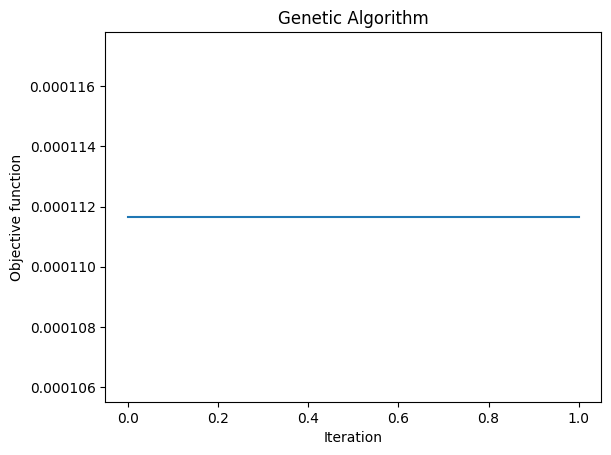

In [12]:
# Initialize the genetic algorithm 
ga_solver = ga(function=fitness_function, dimension=4, variable_type='int', 
               variable_boundaries= np.array([[1,9],[0,7830],[0,628],[0,15630]]),
               function_timeout= 180,
               algorithm_parameters = algo_param)

ga_solver.run()

In [ ]:
new_loss(arr2022,arr2019,arr2020,arr2021)

0.6758634759697788
0.6477824710317955
0.664093653906295
0.6727911618286779
0.008697507922382886
0.016311182874499508
0.6829035583276626


4.956275960578646e-05

In [13]:
kernelSize = 3
predicted_arr = deepcopy(arr2020)
sideMargin = math.ceil(kernelSize/2)

# builtUpThreshold = 1
# distFromRoad = 9000
# popThreshold = -9000
# metroThreshold = 0
# schoolThreshold = 100

# builtUpThreshold = ga_solver.best_variable[0]
# distFromRoad = ga_solver.best_variable[1]
# popThreshold = ga_solver.best_variable[2]
# metroThreshold = ga_solver.best_variable[3]


# for y in range(sideMargin,no_rows-(sideMargin-1)):
#     for x in range(sideMargin,no_cols-(sideMargin-1)):
#         kernel = arr2017[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
#         builtupCount = sum(sum(kernel==1)) 
        
#         if (builtupCount >= builtUpThreshold and road_arr[y,x]<=distFromRoad and arr2017[y,x]!=3 and pop_arr[y,x]>=popThreshold and metro_arr[y,x]>=metroThreshold):
#             predicted_arr[y,x]=1

# builtUpThreshold1 = 5
# builtUpThreshold2 = 5
# builtUpThreshold3 = 6
# distFromRoad = 2985
# popThreshold = 233
# metroThreshold = 8148

builtUpThreshold1 = ga_solver.best_variable[0]
builtUpThreshold2 = min(ga_solver.best_variable[0]+1,9)
builtUpThreshold3 = min(ga_solver.best_variable[0]+1,9)
distFromRoad = ga_solver.best_variable[1]
popThreshold = ga_solver.best_variable[2]
metroThreshold = ga_solver.best_variable[3]
# for y in range(sideMargin,no_rows-(sideMargin-1)):
#     for x in range(sideMargin,no_cols-(sideMargin-1)):
#         kernel1 = arr2020[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
#         kernel2 = arr2021[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
#         kernel3 = arr2022[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
#         builtupCount1 = sum(sum(kernel1==1))
#         builtupCount2 = sum(sum(kernel2==1))
#         builtupCount3 = sum(sum(kernel3==1))
#         # greenCount = sum(sum(kernel==2))           
        
#         if ((builtupCount1 >= builtUpThreshold1 or builtupCount2 >= builtUpThreshold2 or builtupCount3 >= builtUpThreshold3) and road_arr[y,x]<=distFromRoad and arr2020[y,x]!=3 and pop_arr[y,x]>=popThreshold and metro_arr[y,x]>=metroThreshold):
#             predicted_arr[y,x]=1
#         else:
#           cnt=[0,0,0,0]
#           cnt[arr2020[y,x]-1]=cnt[arr2020[y,x]-1]+1
#           cnt[arr2021[y,x]-1]=cnt[arr2021[y,x]-1]+1
#           cnt[arr2022[y,x]-1]=cnt[arr2022[y,x]-1]+1
#           if(cnt[0]>0):
#             predicted_arr[y,x]=1
#           else:
#             predicted_arr[y,x]=cnt.index(max(cnt))+1
kernelSize = 3
predicted_arr = deepcopy(arr2021)
sideMargin = math.ceil(kernelSize/2)

for y in range(sideMargin,no_rows-(sideMargin-1)):
    for x in range(sideMargin,no_cols-(sideMargin-1)):
        kernel1 = arr2021[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        kernel2 = arr2022[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        kernel3 = arr2023[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        builtupCount1 = sum(sum(kernel1==1))
        builtupCount2 = sum(sum(kernel2==1))
        builtupCount3 = sum(sum(kernel3==1))
        # greenCount = sum(sum(kernel==2))           
        
        if ((builtupCount1 >= builtUpThreshold1 or builtupCount2 >= builtUpThreshold2 or builtupCount3 >= builtUpThreshold3) and road_arr[y,x]<=distFromRoad and arr2021[y,x]!=3 and pop_arr[y,x]>=popThreshold and metro_arr[y,x]>=metroThreshold):
            predicted_arr[y,x]=1
        else:
          cnt=[0,0,0,0]
          cnt[arr2021[y,x]-1]=cnt[arr2021[y,x]-1]+1
          cnt[arr2022[y,x]-1]=cnt[arr2022[y,x]-1]+1
          cnt[arr2023[y,x]-1]=cnt[arr2023[y,x]-1]+1
          if(cnt[0]>0):
            predicted_arr[y,x]=1
          else:
            predicted_arr[y,x]=cnt.index(max(cnt))+1



In [14]:
def exportPredicted(outFileName):
    driver = gdal.GetDriverByName("GTiff")
    outdata = driver.Create(outFileName, no_cols, no_rows, 1, gdal.GDT_UInt16) # option: GDT_UInt16, GDT_Float32
    outdata.SetGeoTransform(ds1.GetGeoTransform())
    outdata.SetProjection(ds1.GetProjection())
    outdata.GetRasterBand(1).WriteArray(predicted_arr)
    outdata.GetRasterBand(1).SetNoDataValue(0)        
    outdata.FlushCache() 
    outdata = None

In [ ]:
print(np.unique(arr2019,return_counts=True))
print(np.unique(arr2020,return_counts=True))
print(np.unique(arr2021,return_counts=True))

print(np.unique(arr2022,return_counts=True))

(array([1, 2, 3, 4], dtype=uint8), array([965249, 236264,  21385, 267184]))
(array([1, 2, 3, 4], dtype=uint8), array([989554, 281444,  21209, 197875]))
(array([1, 2, 3, 4], dtype=uint8), array([1002514,  238814,   21856,  226898]))
(array([1, 2, 3, 4], dtype=uint8), array([1047397,  222253,   19070,  201362]))
(array([1, 2, 3, 4], dtype=uint8), array([1007092,  256310,   26563,  200117]))


In [ ]:
print("Accuracy: ", total_loss(arr2022,predicted_arr))
print("SSI-Metric:", ssim(arr2022,predicted_arr,data_range=4))

Accuracy:  tf.Tensor(0.33695337, shape=(), dtype=float32)
SSI-Metric: 0.7529958341990428


In [15]:
print(np.unique(predicted_arr,return_counts=True))
exportPredicted("predicted_2023.tif")
# arr2023=deepcopy(predicted_arr)

(array([1, 2, 3, 4], dtype=uint8), array([1052765,  228810,   20992,  187515]))


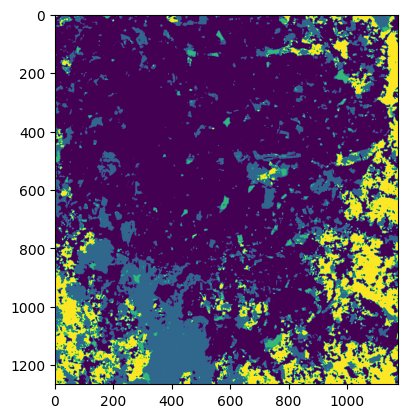

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(arr2022)

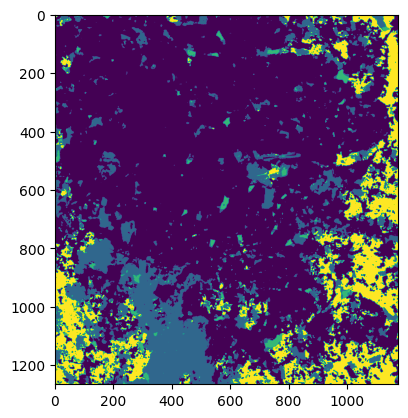

In [ ]:
plt.imshow(predicted_arr)

In [ ]:
kernelSize = 3
predicted_arr = deepcopy(arr2021)
sideMargin = math.ceil(kernelSize/2)
builtUpThreshold1 = 6
builtUpThreshold2 = 7
builtUpThreshold3 = 7
distFromRoad = 239
popThreshold = 100
metroThreshold = 243

# builtUpThreshold1 = ga_solver.best_variable[0]
# builtUpThreshold2 = ga_solver.best_variable[0]+1
# builtUpThreshold3 = ga_solver.best_variable[0]+1
# distFromRoad = ga_solver.best_variable[1]
# popThreshold = ga_solver.best_variable[2]
# metroThreshold = ga_solver.best_variable[3]
for y in range(sideMargin,no_rows-(sideMargin-1)):
    for x in range(sideMargin,no_cols-(sideMargin-1)):
        kernel1 = arr2021[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        kernel2 = arr2022[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        kernel3 = arr2023[y-(sideMargin-1):y+(sideMargin), x-(sideMargin-1):x+(sideMargin)]
        builtupCount1 = sum(sum(kernel1==1))
        builtupCount2 = sum(sum(kernel2==1))
        builtupCount3 = sum(sum(kernel3==1))
        # greenCount = sum(sum(kernel==2))           
        
        if ((builtupCount1 >= builtUpThreshold1 or builtupCount2 >= builtUpThreshold2 or builtupCount3 >= builtUpThreshold3) and road_arr[y,x]<=distFromRoad and arr2021[y,x]!=3 and pop_arr[y,x]>=popThreshold and metro_arr[y,x]>=metroThreshold):
            predicted_arr[y,x]=1
        else:
          cnt=[0,0,0,0]
          cnt[arr2021[y,x]-1]=cnt[arr2021[y,x]-1]+1
          cnt[arr2022[y,x]-1]=cnt[arr2022[y,x]-1]+1
          cnt[arr2023[y,x]-1]=cnt[arr2023[y,x]-1]+1
          if(cnt[0]>0):
            predicted_arr[y,x]=1
          else:
            predicted_arr[y,x]=cnt.index(max(cnt))+1

In [ ]:
print(np.unique(arr2021,return_counts=True))
print(np.unique(arr2022,return_counts=True))
print(np.unique(arr2023,return_counts=True))
print(np.unique(predicted_arr,return_counts=True))

(array([1, 2, 3, 4], dtype=uint8), array([1002514,  238814,   21856,  226898]))
(array([1, 2, 3, 4], dtype=uint8), array([1007092,  256310,   26563,  200117]))
(array([1, 2, 3, 4], dtype=uint8), array([1052721,  229182,   20987,  187192]))
(array([1, 2, 3, 4], dtype=uint8), array([1052764,  228810,   20992,  187516]))


In [16]:
1047397/1490082


0.7029123229459855

In [17]:
1002514/1490082

0.6727911618286779

In [18]:
1052721/1490082

0.7064852806758286

In [19]:
5367/1490082

0.0036018152021163935

In [20]:
44883/1490082

0.03012116111730764

In [21]:
25125/1490082

0.016861488159712015

In [22]:
2868/1490082

0.0019247262902310075

In [23]:
1074978/1490082

0.7214220425453096